In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r'D:\DS-Input-Files\Linear-regression\insurance_prediction.csv')

In [3]:
data.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [4]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
data['sex']=number.fit_transform(data['sex'].astype('str'))
data['smoker']=number.fit_transform(data['smoker'].astype('str'))
data['region']=number.fit_transform(data['region'].astype('str'))
data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
data.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


In [7]:
x=data.drop(['expenses','bmi'],axis=1)
y=data['expenses']

In [8]:
x.columns

Index(['age', 'sex', 'children', 'smoker', 'region'], dtype='object')

In [9]:
y.head(2)

0    16884.92
1     1725.55
Name: expenses, dtype: float64

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [12]:
scx=StandardScaler()

In [13]:
x_train_std=scx.fit_transform(x_train)
x_test_std=scx.fit_transform(x_test)

In [17]:
scx.fit_transform(x_train_std)
scx.fit_transform(x_test_std)

array([[ 1.59219877, -1.03030989, -0.88713303, -0.51685538, -0.4995791 ],
       [-1.25870666,  0.97058178, -0.04104174,  1.9347772 ,  0.42060783],
       [ 1.30710823, -1.03030989, -0.88713303, -0.51685538,  1.34079476],
       ...,
       [ 0.30929133, -1.03030989, -0.04104174,  1.9347772 , -1.41976603],
       [ 1.52092614,  0.97058178, -0.04104174,  1.9347772 , -0.4995791 ],
       [ 0.52310923,  0.97058178,  1.65114084,  1.9347772 , -0.4995791 ]])

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train_std,y_train)

LinearRegression()

In [22]:
train_pred=model.predict(x_train_std)
test_pred=model.predict(x_test_std)

In [23]:
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
print("Training Predictions are: \n")
print("R2 score is ",r2_score(y_train,train_pred))
print("MSE is ",mean_squared_error(y_train,train_pred))

Training Predictions are: 

R2 score is  0.6953170920973083
MSE is  44043640.40978204


In [26]:
print("Testing Predictions are:\n")
print("R2 score is ",r2_score(y_test,test_pred))
print("MSE is ",mean_squared_error(y_test,test_pred))

Testing Predictions are:

R2 score is  0.7599768949468164
MSE is  35869245.30368581


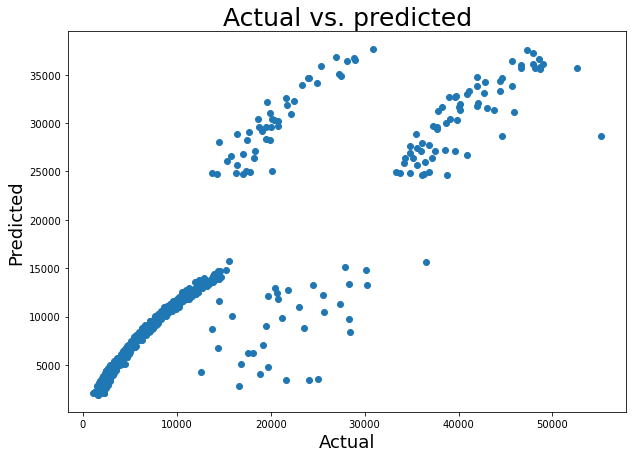

In [41]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted",fontsize=25)
plt.xlabel("Actual",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test,y=test_pred)
#plt.bar(x=y_test,y=test_pred,height=1)
#sns.lineplot(data=data, x=y_test,y=test_pred)

In [47]:
##Trying to remove unwanted columns and then predict
x.columns

Index(['age', 'sex', 'children', 'smoker', 'region'], dtype='object')

In [69]:
x1 = x.drop(['children','smoker'],axis=1)
x1.columns

Index(['age', 'sex', 'region'], dtype='object')

In [70]:
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.4)

In [71]:
scx1=StandardScaler()

In [72]:
x1_train_std=scx1.fit_transform(x1_train)
x1_test_std=scx1.fit_transform(x1_test)

In [73]:
super_model=LinearRegression()

In [74]:
super_model.fit(x1_train_std,y_train)

LinearRegression()

In [77]:
train_predictions=super_model.predict(x1_train_std)
test_predictions=super_model.predict(x1_test_std)

In [79]:
print("Training Predictions are: \n")
print("R2 score is ",r2_score(y_train,train_predictions))
print("MSE is ",mean_squared_error(y_train,train_predictions))

Training Predictions are: 

R2 score is  0.11598837676322005
MSE is  131763298.34328817


In [80]:
print("Testing Predictions are:\n")
print("R2 score is ",r2_score(y_test,test_predictions))
print("MSE is ",mean_squared_error(y_test,test_predictions))

Testing Predictions are:

R2 score is  0.05145115869093431
MSE is  135338041.22853526


In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted",fontsize=25)
plt.xlabel("Actual",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test,y=test_pred)
#plt.bar(x=y_test,y=test_pred,height=1)
#sns.lineplot(data=data, x=y_test,y=test_pred)

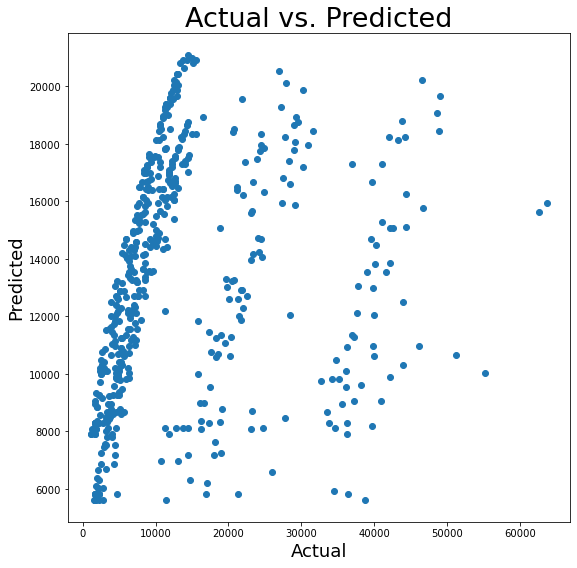

In [82]:
plt.figure(figsize=(9,9))
plt.title("Actual vs. Predicted",fontsize=27)
plt.xlabel("Actual",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=y_test,y=test_predictions)